# Playground

A place that hosts different tests and experiments necessary during the development of the notebooks.


## Comparing the FID calculations (old and new)

frechet_inception.distance.py is used as an evaluation step during training, whereas fid.py was developed to be run after the training is done. The two scripts should produce the same results.

In [1]:
import numpy as np
import tensorflow as tf
import fid as fid_new
import frechet_inception_distance_OLD as fid_old
from dataset_utils import DatasetLoader
from ModelProxy import Pix2PixModelProxy

dataset_loader = DatasetLoader("all", "test", limit=500)
pix2pix = Pix2PixModelProxy("models/pix2pix")

test_ds = dataset_loader.dataset.batch(100)


In [2]:
real_images = []
fake_images = []
for i, batch in test_ds.enumerate():
    target_images = tf.gather(batch, 3) 
    generated_images = pix2pix.generate(2, 3, batch)
    real_images.append(target_images.numpy())
    fake_images.append(generated_images.numpy())

real_images = np.concatenate(real_images)
fake_images = np.concatenate(fake_images)
value_old = fid_old.compare(real_images, fake_images)
value_new = fid_new.calculate_fid(real_images, fake_images)
value_new_split = fid_new.calculate_fid_from_metrics(
    fid_new.calculate_metrics_for_dataset(real_images),
    fid_new.calculate_metrics_for_dataset(fake_images)
)
print(f"Old FID: {value_old}")
print(f"New FID: {value_new}")
print(f"New FID (split): {value_new_split}")

In [3]:
from image_utils import show_single_image

show_single_image(real_images[0], "real 0")
show_single_image(fake_images[0], "fake 0")


## Comparing the resizing methods (TF vs skimage)

In [4]:
import skimage.transform as sk_transforms
tf_resized = tf.image.resize(real_images[0][..., 0:3], (299, 299), method="nearest")
sk_resized = sk_transforms.resize(real_images[0][..., 0:3], (299, 299, 3), order=0)

l1_distance = np.mean(np.abs(tf_resized.numpy() - sk_resized))
print(f"L1 distance: {l1_distance}")

show_single_image(tf_resized.numpy(), "tf_resized")
show_single_image(sk_resized, "sk_resized")



## Creating a checkerboard pattern


In [14]:
import tensorflow as tf
from matplotlib import pyplot as plt

checkerboard_image = tf.pad(tf.tile(tf.constant([[0, 1], [1, 0]], dtype=tf.float32), [4, 4]), [[1, 1], [1, 1]], constant_values=1)
print(checkerboard_image)
plt.imshow(checkerboard_image * 0.3 + 0.7, cmap="gray", vmin=0, vmax=1)
plt.axis("off")
plt.show()


## Generating image with samples from the Larger database



In [1]:
from math import ceil

dataset_sizes = [912, 216, 294, 408, 12372]
train_sizes = [int(ceil(size * 0.85)) for size in dataset_sizes]
test_sizes = [size - train_size for size, train_size in zip(dataset_sizes, train_sizes)]
print("train_sizes", train_sizes)
print("test_sizes", test_sizes)

starting_index_train = [0] + [sum(train_sizes[:i]) for i in range(1, len(train_sizes))]
starting_index_test = [0] + [sum(test_sizes[:i]) for i in range(1, len(test_sizes))]
print("starting_index_train", starting_index_train)
print("starting_index_test", starting_index_test)

In [5]:
from matplotlib import pyplot as plt
from dataset_utils import DatasetLoader

train_dataset_loader = DatasetLoader("all", "train")
test_dataset_loader = DatasetLoader("all", "test")

# train_indices = [1557+2, 1557+7876, 1557+9489, 0+99]
# test_indices = [273+74, 273+1551, 273+1709, ]
train_indices = []
test_indices = [168+23, 168+3, 168+5]

# gets images with train and test indices in the columns and the four different directions in the rows
train_images = [train_dataset_loader.load_paired_images(number) for number in train_indices]
test_images = [test_dataset_loader.load_paired_images(number) for number in test_indices]
all_images = train_images + test_images

# shows an image with the four different directions in the rows and the train and test images in the columns
rows = 4
cols = len(all_images)
fig = plt.figure(figsize=(4*cols, 4*rows))
for i in range(rows):
    for j in range(cols):
        plt.subplot(rows, cols, i*cols + j + 1, facecolor='w')
        plt.imshow(all_images[j][i] * 0.5 + 0.5, interpolation="nearest")
        plt.axis("off")
plt.tight_layout()
plt.show()
# plt.savefig("larger-dataset-examples.png", transparent=True)

## Generating a checkerboard pattern


tf.Tensor(
[[[0.  0.  0.  0. ]
  [0.  0.  0.  0. ]
  [0.  0.  0.  0. ]
  [0.  0.  0.  0. ]
  [0.  0.  0.  0. ]
  [0.  0.  0.  0. ]
  [0.  0.  0.  0. ]
  [0.  0.  0.  0. ]
  [0.  0.  0.  0. ]
  [0.  0.  0.  0. ]]

 [[0.  0.  0.  0. ]
  [0.8 0.8 0.8 1. ]
  [1.  1.  1.  1. ]
  [0.8 0.8 0.8 1. ]
  [1.  1.  1.  1. ]
  [0.8 0.8 0.8 1. ]
  [1.  1.  1.  1. ]
  [0.8 0.8 0.8 1. ]
  [1.  1.  1.  1. ]
  [0.  0.  0.  0. ]]

 [[0.  0.  0.  0. ]
  [1.  1.  1.  1. ]
  [0.8 0.8 0.8 1. ]
  [1.  1.  1.  1. ]
  [0.8 0.8 0.8 1. ]
  [1.  1.  1.  1. ]
  [0.8 0.8 0.8 1. ]
  [1.  1.  1.  1. ]
  [0.8 0.8 0.8 1. ]
  [0.  0.  0.  0. ]]

 [[0.  0.  0.  0. ]
  [0.8 0.8 0.8 1. ]
  [1.  1.  1.  1. ]
  [0.8 0.8 0.8 1. ]
  [1.  1.  1.  1. ]
  [0.8 0.8 0.8 1. ]
  [1.  1.  1.  1. ]
  [0.8 0.8 0.8 1. ]
  [1.  1.  1.  1. ]
  [0.  0.  0.  0. ]]

 [[0.  0.  0.  0. ]
  [1.  1.  1.  1. ]
  [0.8 0.8 0.8 1. ]
  [1.  1.  1.  1. ]
  [0.8 0.8 0.8 1. ]
  [1.  1.  1.  1. ]
  [0.8 0.8 0.8 1. ]
  [1.  1.  1.  1. ]
  [0.8 0.8 0.8 1. ]
 

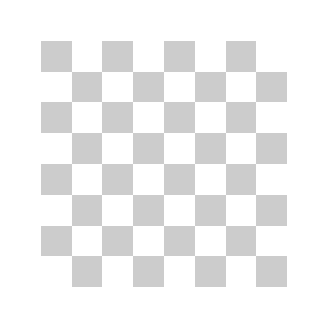

In [12]:
import tensorflow as tf
from matplotlib import pyplot as plt

def checkerboard_pattern():
    return tf.pad(tf.tile(tf.constant([[0, 1], [1, 0]], dtype=tf.float32), [4, 4]), [[1, 1], [1, 1]],
                  constant_values=1) * 0.2 + 0.8

def new_checkerboard_pattern():
    checkers = tf.tile(tf.constant([[0, 1], [1, 0]], dtype=tf.float32), [4, 4])
    rgba_checkers = tf.stack([checkers, checkers, checkers, tf.ones_like(checkers)], axis=-1) * 0.2 + 0.8
    return tf.pad(rgba_checkers, [[1, 1], [1, 1], [0, 0]], constant_values=0)

image = new_checkerboard_pattern()
print(image)
f = plt.figure(figsize=(4, 4))
plt.imshow(image)
plt.axis("off")
plt.show()
f.patch.set_alpha(0.0)
f.savefig("output/checkerboard-pattern.png", transparent=True)
